In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
file_path = '/content/drive/MyDrive/weatherHistory.csv'
data = pd.read_csv(file_path)

# Inspect the dataset
print(data.head())
print(data.info())


                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

In [4]:
# Ensure consistent datetime conversion
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], errors='coerce', utc=True)

# Drop rows where datetime conversion failed
data = data.dropna(subset=['Formatted Date'])

# Extract useful features from 'Formatted Date'
data['Year'] = data['Formatted Date'].dt.year
data['Month'] = data['Formatted Date'].dt.month
data['Day'] = data['Formatted Date'].dt.day
data['Hour'] = data['Formatted Date'].dt.hour

# Drop the original 'Formatted Date' column as it's no longer needed
data.drop('Formatted Date', axis=1, inplace=True)


In [6]:
# Define features (X) and target (y)
X = data.drop('Daily Summary', axis=1)
y = data['Daily Summary']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Training features shape: (77162, 14)
Testing features shape: (19291, 14)
Training target shape: (77162,)
Testing target shape: (19291,)


In [8]:
# Identify categorical columns
categorical_cols = ['Summary', 'Precip Type']

# One-hot encode or label encode categorical features
X_encoded = pd.get_dummies(data.drop('Daily Summary', axis=1), columns=categorical_cols)

# Define the target variable (y)
y = data['Daily Summary']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Verify no string values remain
print(X_train.head())


       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
43345        15.438889                 15.438889      0.96            10.8675   
66832         6.027778                  1.133333      0.67            33.5041   
92142        18.238889                 18.238889      0.97             5.7316   
24092        10.227778                 10.227778      0.66             3.2200   
35372         7.950000                  5.538889      0.76            14.0070   

       Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
43345                     0.0           5.1359         0.0   
66832                   302.0          11.3988         0.0   
92142                   262.0          14.6832         0.0   
24092                   310.0           9.9820         0.0   
35372                   300.0           9.9820         0.0   

       Pressure (millibars)  Year  Month  ...  Summary_Partly Cloudy  \
43345               1014.97  2010      9  ...                  False

In [9]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Accuracy: 0.72


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Encode the target column
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(data['Daily Summary'])  # Encode target to integers

# One-hot encode categorical features in the input data
categorical_cols = ['Summary', 'Precip Type']
X_encoded = pd.get_dummies(data.drop('Daily Summary', axis=1), columns=categorical_cols)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Decode predictions for a readable classification report
y_test_decoded = y_encoder.inverse_transform(y_test)
y_pred_decoded = y_encoder.inverse_transform(y_pred)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test_decoded, y_pred_decoded, target_names=y_encoder.classes_))


Accuracy: 0.72

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                                                                               precision    recall  f1-score   support

                                                                                    Breezy and foggy starting in the evening.       1.00      1.00      1.00         2
                                                                                              Breezy and foggy until morning.       0.75      0.75      0.75         4
                                                                                          Breezy and mostly cloudy overnight.       1.00      1.00      1.00         1
                                                                                   Breezy and partly cloudy in the afternoon.       0.60      0.50      0.55         6
                                                                              Breezy in the morning and foggy in the evening.       1.00      0.56      0.71        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-13-8f0afb3ec5c3>:29: UserWarning: 

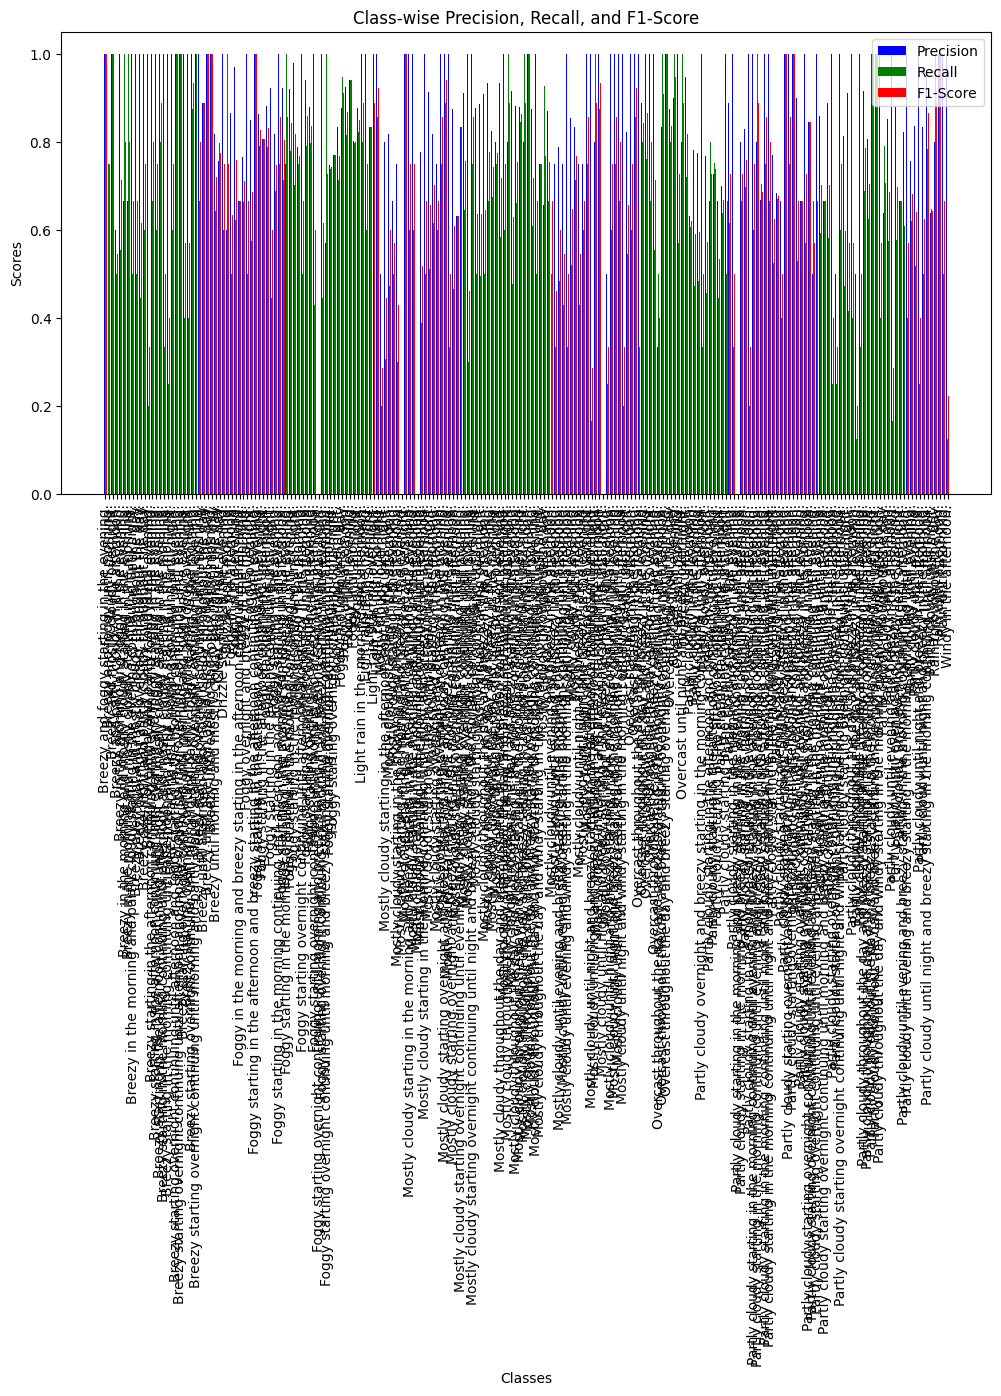

<ipython-input-13-8f0afb3ec5c3>:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


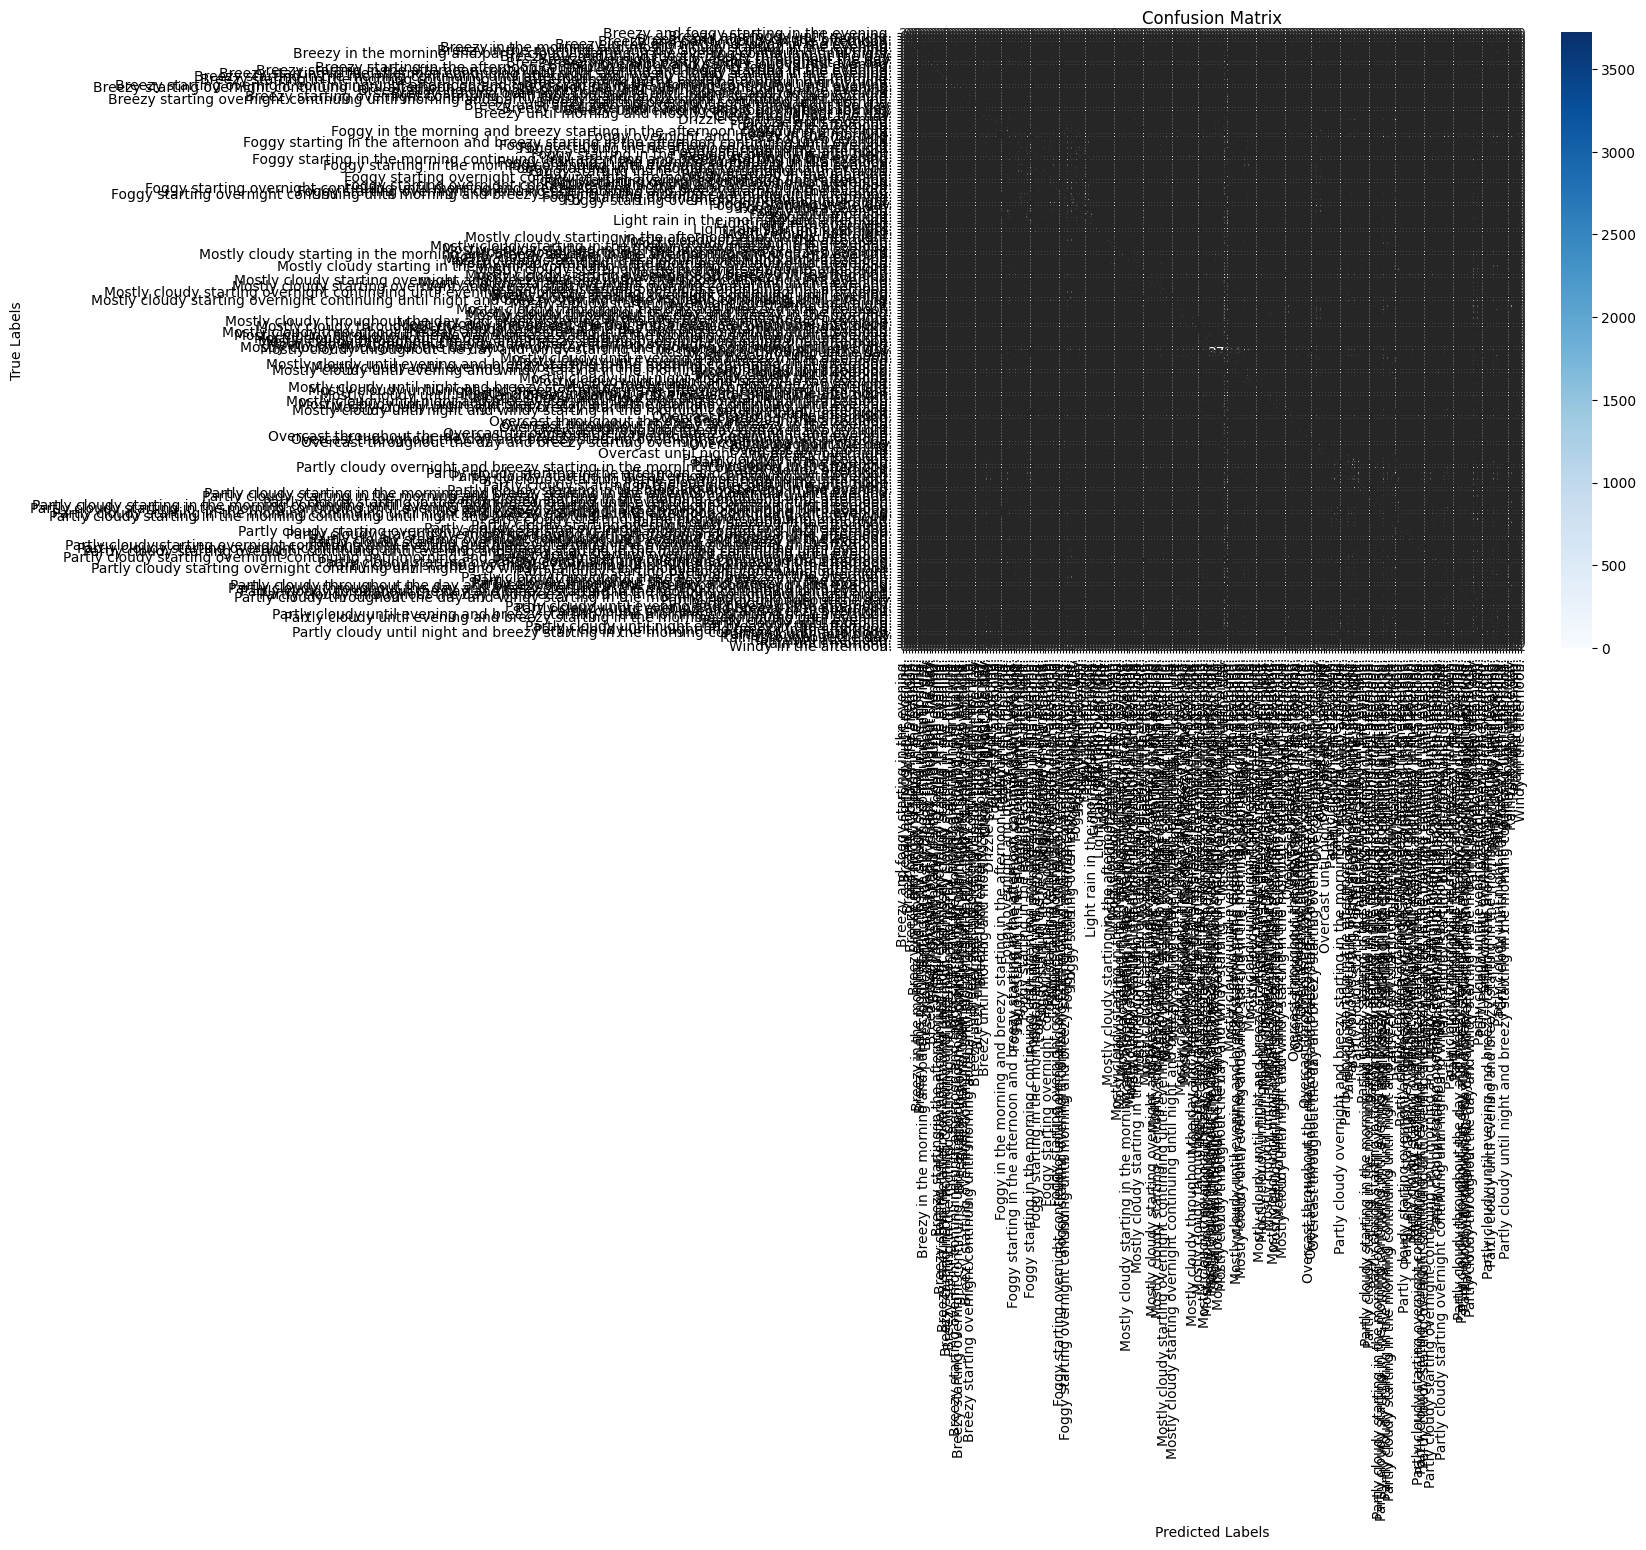

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Decode predictions and ground truth for readability
y_test_decoded = y_encoder.inverse_transform(y_test)
y_pred_decoded = y_encoder.inverse_transform(y_pred)

# Generate the classification report as a dictionary
report = classification_report(y_test_decoded, y_pred_decoded, output_dict=True)

# Extract class-wise metrics
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Plot bar chart for precision, recall, and F1-score
x = range(len(classes))  # Position of classes on the x-axis
plt.figure(figsize=(12, 6))
plt.bar(x, precision, width=0.25, label='Precision', color='b', align='center')
plt.bar([p + 0.25 for p in x], recall, width=0.25, label='Recall', color='g', align='center')
plt.bar([p + 0.5 for p in x], f1_score, width=0.25, label='F1-Score', color='r', align='center')
plt.xticks([p + 0.25 for p in x], classes, rotation=90)
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Class-wise Precision, Recall, and F1-Score')
plt.legend()
plt.tight_layout()
plt.show()

# Confusion matrix
cm = confusion_matrix(y_test_decoded, y_pred_decoded, labels=classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
